*Importazione Librerie*

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np
import scipy.stats as stats
#!pip install scipy==1.7.0
import scipy
print (scipy.__version__)

1.7.1


# Dataset 9000+ Movies #

*Il dataset 9000+ Movies contiene un campione di fil ordinati per popolarita per Recommender Systems*

1. Importiamo il dataset:

In [2]:
mvs = pd.read_csv('mymoviedb.csv',lineterminator='\n')
mvs.info()
mvs.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   object 
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   int64  
 5   Vote_Average       9827 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9827 non-null   object 
 8   Poster_Url         9827 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 691.1+ KB


,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


*Otteniamo Informazione sul numero di righe e di colonne*

In [3]:
mvs.shape

(9827, 9)

*Determiniamo Tramite l'uso della describe() quali features sono quantitative:*

In [4]:
mvs.describe()

,Popularity,Vote_Count,Vote_Average
count,9827.000000,9827.000000,9827.000000
mean,40.326088,1392.805536,6.439534
std,108.873998,2611.206907,1.129759
min,13.354000,0.000000,0.000000
25%,16.128500,146.000000,5.900000
50%,21.199000,444.000000,6.500000
75%,35.191500,1376.000000,7.100000
max,5083.954000,31077.000000,10.000000


*Quindi le **Features Quantitative** sono 3:*
1. Popularity
2. Vote_Count
3. Vote_Avarage

*Le **Features Qualitative** sono 6:*
1. Release_Date	
2. Title	
3. Overview		
4. Original_Language	
5. Genre	
6. Poster_Url


*Verifichiamo se nel DataSet ci sono colonne con dei dati mancanti:*

In [5]:
mvs.isnull().sum()

Release_Date         0
Title                0
Overview             0
Popularity           0
Vote_Count           0
Vote_Average         0
Original_Language    0
Genre                0
Poster_Url           0
dtype: int64

**Il DataSet non ha dati Mancanti**

Visualizziamo alcune delle features, per estrapolare interessanti informazioni. Per esempio:

1. Quale era la distribuzione dei film negli anni?
2. La distribuzione dei film divisa per genere?
3. Quale e' la popolarità dei film, divisa per genere?
4. Quale e' la valutazione media dei film, divisa per genere?




**1. Quale era la distribuzione dei film negli anni?**
Prima di tutto Modifichiamo il formato della data lasciando segnato solo l'anno per semplificarci la visione della distribuzione


In [6]:
release=mvs['Release_Date']
release=release.str.slice_replace(4, 10, '')
release.head()
release.describe()

count     9827
unique     102
top       2021
freq       714
Name: Release_Date, dtype: object

*Fatto ciò visualizziamo la distribuzione dei film nei vari anni:*

*Provare con scatter*

2021    0.072657
2018    0.053933
2017    0.051898
2019    0.050880
2016    0.047827
          ...   
1902    0.000102
1920    0.000102
2024    0.000102
1929    0.000102
1930    0.000102
Name: Release_Date, Length: 102, dtype: float64


<AxesSubplot:>

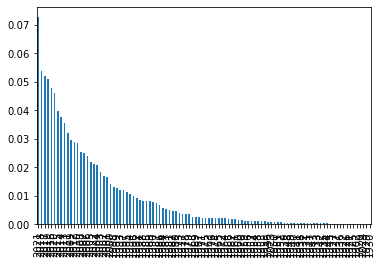

In [7]:
release=release.value_counts(normalize=True,sort=True)
print(release)
release.plot(kind = 'bar')

**Come possiamo notare dal 1930 al 2021 c'è stato un aumento esponenziale della produzione di film**

**2. La distribuzione dei film divisa per genere?** Prima di tutto Modifichiamo il nostro DataSet per avere un solo genere per riga.

In [8]:
mvs['Genre']= mvs['Genre'].str.split(', ')
mvs= mvs.explode('Genre').reset_index(drop=True)
mvs.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,Action,https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,Adventure,https://image.tmdb.org/t/p/original/1g0dhYtq4i...
2,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,Science Fiction,https://image.tmdb.org/t/p/original/1g0dhYtq4i...
3,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,Crime,https://image.tmdb.org/t/p/original/74xTEgt7R3...
4,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,Mystery,https://image.tmdb.org/t/p/original/74xTEgt7R3...


*Calcolo della Distribuzione:*

<AxesSubplot:>

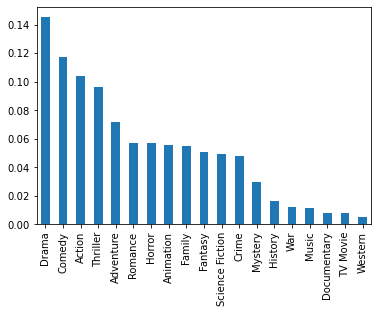

In [11]:
genere=mvs['Genre'].value_counts(normalize=True,sort=True)
genere.plot(kind = 'bar')

*Dal calcolo della distribuzione possiamo vedere che rispetto agli altri generi, i film contenenti il genere **Drama** sono di più.
Si puo ipotizzare che il genere Drama essendo quello più presente, sia anche il più piaciuto, andiamo a verificare:*

**3. Quale e' la popolarità dei film, divisa per genere?**

  Utilizzo un grafico a dispersione per visualizzare la relazione tra **popolarità e genere**

<AxesSubplot:xlabel='Genre'>

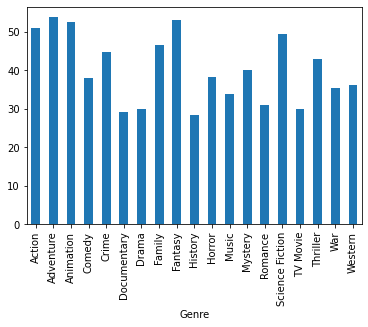

In [16]:
mvs.groupby('Genre').Popularity.mean().plot(kind='bar')

*Come Possiamo vedere i generi di Film più popolari sono **Adventure e Fantasy** e non Drama come pensavo.
Ci immaginiamo che i film di Adventure e di Fantasy siano quelli con la valutazione media maggiore in quanto più popolari. 
Verifichiamo questa Tesi:*


**4. Quale e' la valutazione media dei film, divisa per genere?**


<AxesSubplot:xlabel='Genre'>

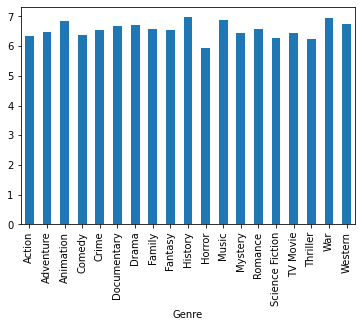

In [20]:
mvs.groupby('Genre').Vote_Average.mean().plot(kind='bar')

Al contrario di ciò che potevamo pensare i film con la valutazione media più alta sono i film di genere **History**

Ora ci chiediamo, c'e' qualche correlazione tra qualcuna delle features riportate dal dataset? 
Verifichiamolo, calcolando l'**indice di correlazione di Pearson** tra le varie features a disposizione. 

In [21]:
mvs.corr(method='pearson')

,Popularity,Vote_Count,Vote_Average
Popularity,1.000000,0.146358,0.068284
Vote_Count,0.146358,1.000000,0.248307
Vote_Average,0.068284,0.248307,1.000000


Come Possiamo vedere tra le Features la correlazione è bassissima